In [1]:
%matplotlib inline


Brent's method
================

Illustration of 1D optimization: Brent's method



Converged at  6
Converged at  23


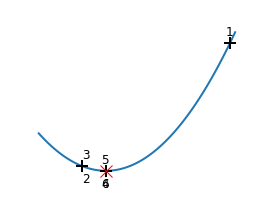

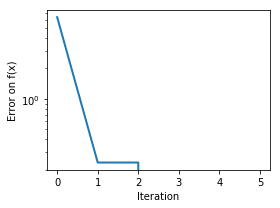

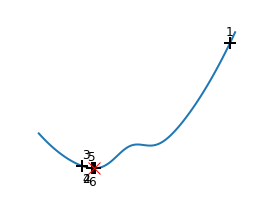

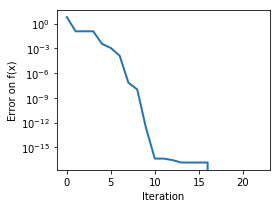

In [2]:
import numpy as np
import pylab as pl
from scipy import optimize

x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

for epsilon in (0, 1):
    pl.figure(figsize=(3, 2.5))
    pl.axes([0, 0, 1, 1])

    # A convex function
    pl.plot(x, f(x), linewidth=2)

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            print('Converged at ', iter)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            pl.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)

    pl.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)

    pl.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
    pl.axis('off')
    pl.ylim(ymin=-1, ymax=8)

    pl.figure(figsize=(4, 3))
    pl.semilogy(np.abs(all_y - all_y[-1]), linewidth=2)
    pl.ylabel('Error on f(x)')
    pl.xlabel('Iteration')
    pl.tight_layout()

pl.show()

In [4]:
print([f(x) for x in range(0,10)])

[0.1584780355602638, 1.315997586544325, 2.6654650374856304, 6.928058636342427, 13.192299753865074, 21.456540871522186, 31.7207819891793, 43.985023106836415, 58.24926422449353, 74.51350534215064]


In [16]:
OptimizeResult_Brent = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)

OptimizeResult_Golden = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Golden",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)

OptimizeResult_Bounded = optimize.minimize_scalar(f, method="Bounded", bounds=(-10,10),
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)

C:\ProgramData\Anaconda3\envs\DataScienceRetreat\lib\site-packages\scipy\optimize\_minimize.py:763: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


In [17]:
OptimizeResult_Brent

     fun: 0.12229946413411434
    nfev: 26
     nit: 22
 success: True
       x: 0.1281291282798001

In [18]:
OptimizeResult_Golden

     fun: 0.12229946422632042
    nfev: 28
     nit: 23
 success: False
       x: 0.12813526557799354

In [19]:
OptimizeResult_Bounded

     fun: 0.12229946413411433
 message: 'Solution found.'
    nfev: 16
  status: 0
 success: True
       x: 0.12812913005806098